# Libraries

In [2]:
## Suppress warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import pickle

## Notebook display settings
from IPython.display import display
pd.options.display.max_columns = None

## Graph modules
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from mpl_toolkits.mplot3d import Axes3D

## Plot style
%matplotlib inline

colors = {0:'tab:blue',1:'tab:orange',2:'tab:green'}



# Load Data

In [3]:
with open('data.pickle', 'rb') as handle:
    data = pickle.load(handle)
data.head()

,id,run,timestamp,segment,start_time,end_time,force_x,force_y,force_z,pos_x,pos_y,pos_z,rot_x,rot_y,rot_z,result_robot
0,163.0,0.0,2017-05-30 09:21:13.150,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.543045,-2.924596,-7.257000,-257.695704,-265.980105,240.007357,-0.008832,0.034723,179.958414,Success
1,164.0,0.0,2017-05-30 09:21:13.200,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.465969,-3.278856,-7.522000,-257.617629,-265.999590,240.004745,-0.000171,0.019928,179.968161,Success
2,165.0,0.0,2017-05-30 09:21:13.250,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.317475,-3.435834,-7.705999,-256.626803,-266.602650,239.791224,-179.993978,179.989304,0.164766,Success
3,166.0,0.0,2017-05-30 09:21:13.300,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.298383,-3.457754,-7.580999,-254.594017,-267.926090,239.323013,-179.992478,179.999036,0.577883,Success
4,167.0,0.0,2017-05-30 09:21:13.350,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.289898,-3.447854,-7.539000,-251.411919,-269.894497,238.550625,-179.996649,179.988091,1.210269,Success


# Data Exploration

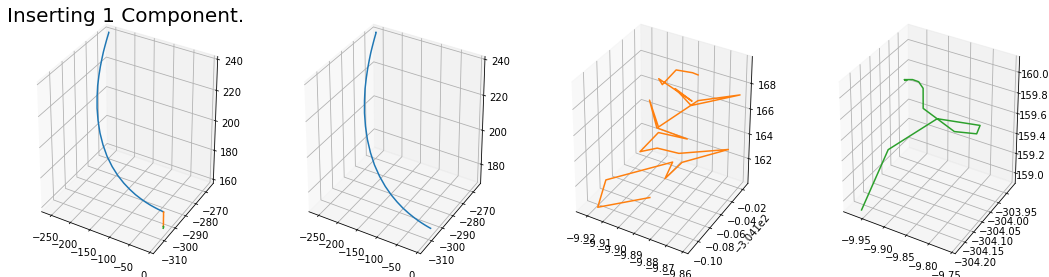

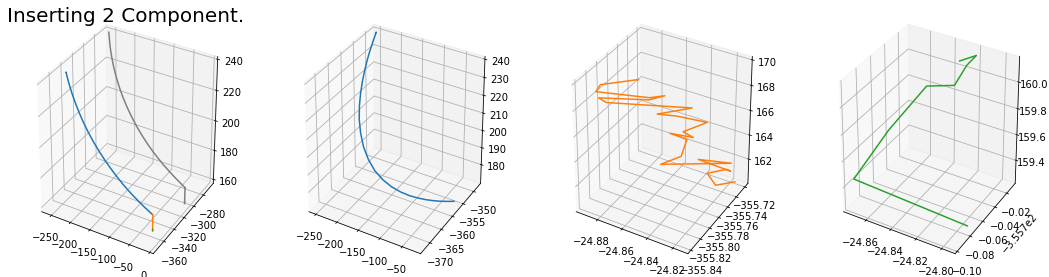

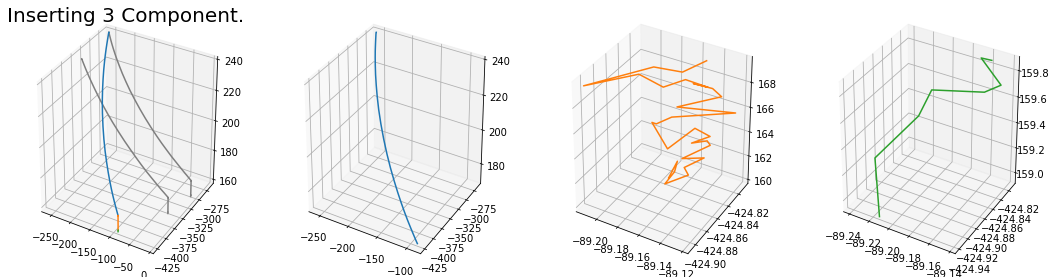

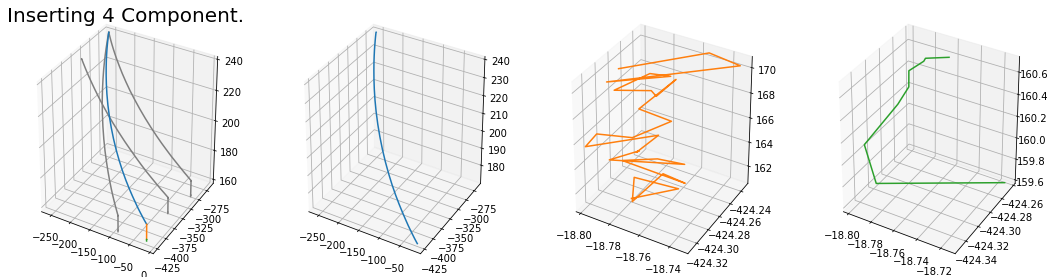

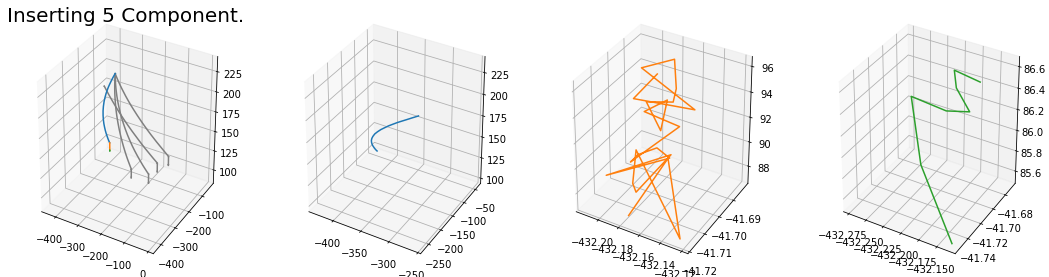

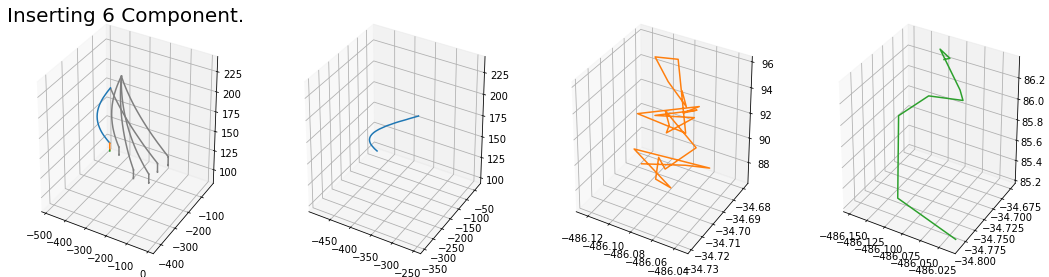

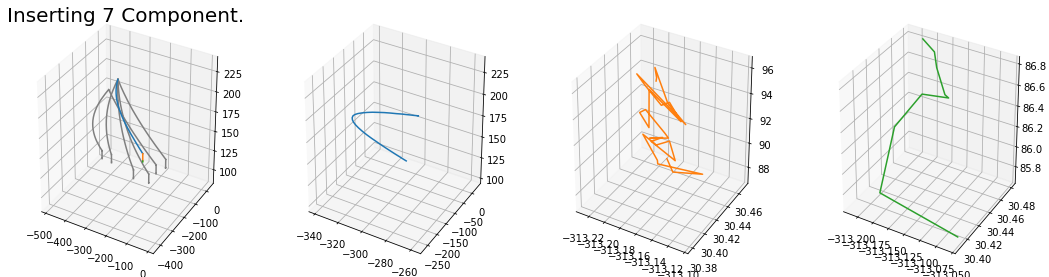

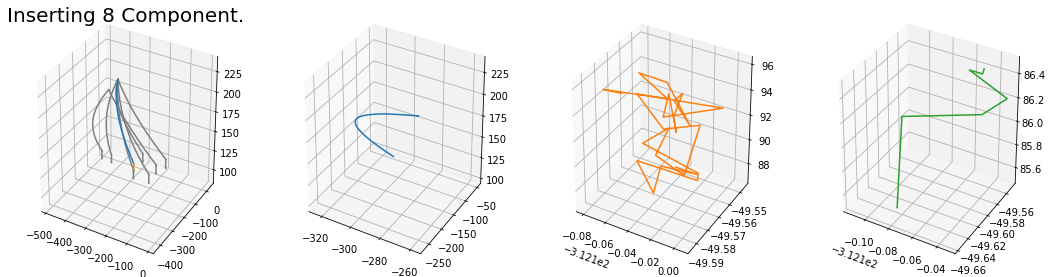

In [4]:
# take run == 0 as example
df_temp = data[data["run"]==11]
for i in range(int(len(df_temp["segment"].unique())/3)):
    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(1, 4, 1, projection='3d')
    plt.title('Inserting {} Component.'.format(i+1), fontsize=20)
    #ax.title.set_text('Inserting {} Component.'.format(i+1))
    for index, seg in enumerate(df_temp["segment"].unique()[0:i*3]):
        t = df_temp[df_temp["segment"]==seg]
        x = t['pos_x']
        y = t['pos_y']
        z = t['pos_z']

        ax.plot(x, y, z, color="tab:gray")

        
    for index, seg in enumerate(df_temp["segment"].unique()[i*3:(i+1)*3]):
        t = df_temp[df_temp["segment"]==seg]
        x = t['pos_x']
        y = t['pos_y']
        z = t['pos_z']

        ax.plot(x, y, z)

    for index, seg in enumerate(df_temp["segment"].unique()[i*3:(i+1)*3]):
        t = df_temp[df_temp["segment"]==seg]
        x = t['pos_x']
        y = t['pos_y']
        z = t['pos_z']
        ax = fig.add_subplot(1,4, index%3+2, projection='3d' )
        ax.plot(x, y, z,color = colors[index])
    plt.tight_layout()
    
    #plt.savefig("{}.png".format(i),dpi=300,transparent=True)